In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import the input data for the deep neural network model
input = pd.read_csv('prepared_data/peaks_input_tissues.csv', sep=',', header=None)

# import the output data for the deep neural network model
output = pd.read_csv('prepared_data/exp_output_tissues.csv', sep=',', header=None)

In [4]:
# convert the input data to a tensor
input_tensor = torch.tensor(input.values)

# convert the output data to a tensor
output_tensor = torch.tensor(output.values)

In [18]:
# Define the neural network architecture
class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        # self.sigmoid = nn.Sigmoid() - not needed for regression model

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        # x = self.sigmoid(x)
        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Define input size, hidden size, and output size
input_size = 10000  # Replace with the actual size of your input features
hidden_size = 400
output_size = 360  # For binary classification

# Create an instance of the model
model = SimpleDNN(input_size, hidden_size, output_size)

# Define a loss function and optimizer
criterion = nn.MSELoss()  # MSE loss for regression
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
# run the model for one epoch
epoch = 100

for i in range(epoch):
    # Forward pass
    prediction = model(input_tensor.float())  # convert input_tensor to float

    # Backward pass and optimization
    loss = criterion(prediction, output_tensor.float())  # convert output_tensor to float
    # print epoch and loss (every 10 epochs)
    if i % 10 == 0:
        print('Epoch: {} - Loss: {:.6f}'.format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 - Loss: 864.981750
Epoch: 10 - Loss: 855.539490
Epoch: 20 - Loss: 733.814026
Epoch: 30 - Loss: 451.326813
Epoch: 40 - Loss: 284.641418
Epoch: 50 - Loss: 167.184067
Epoch: 60 - Loss: 98.277245
Epoch: 70 - Loss: 59.145866
Epoch: 80 - Loss: 36.248871
Epoch: 90 - Loss: 22.866863


In [20]:
# read the test data
test_input = pd.read_csv('prepared_data/peaks_input_lines.csv', sep=',', header=None)
test_output = pd.read_csv('prepared_data/exp_output_lines.csv', sep=',', header=None)

# convert the test data to a tensor
test_input_tensor = torch.tensor(test_input.values)
test_output_tensor = torch.tensor(test_output.values)

# run the model on the test data
test_prediction = model(test_input_tensor.float())  # convert test_input_tensor to float

# calculate the loss on the test data
test_loss = criterion(test_prediction, test_output_tensor.float())  # convert test_output_tensor to float
print('Test loss: {:.6f}'.format(test_loss.item()))

Test loss: 614.661316


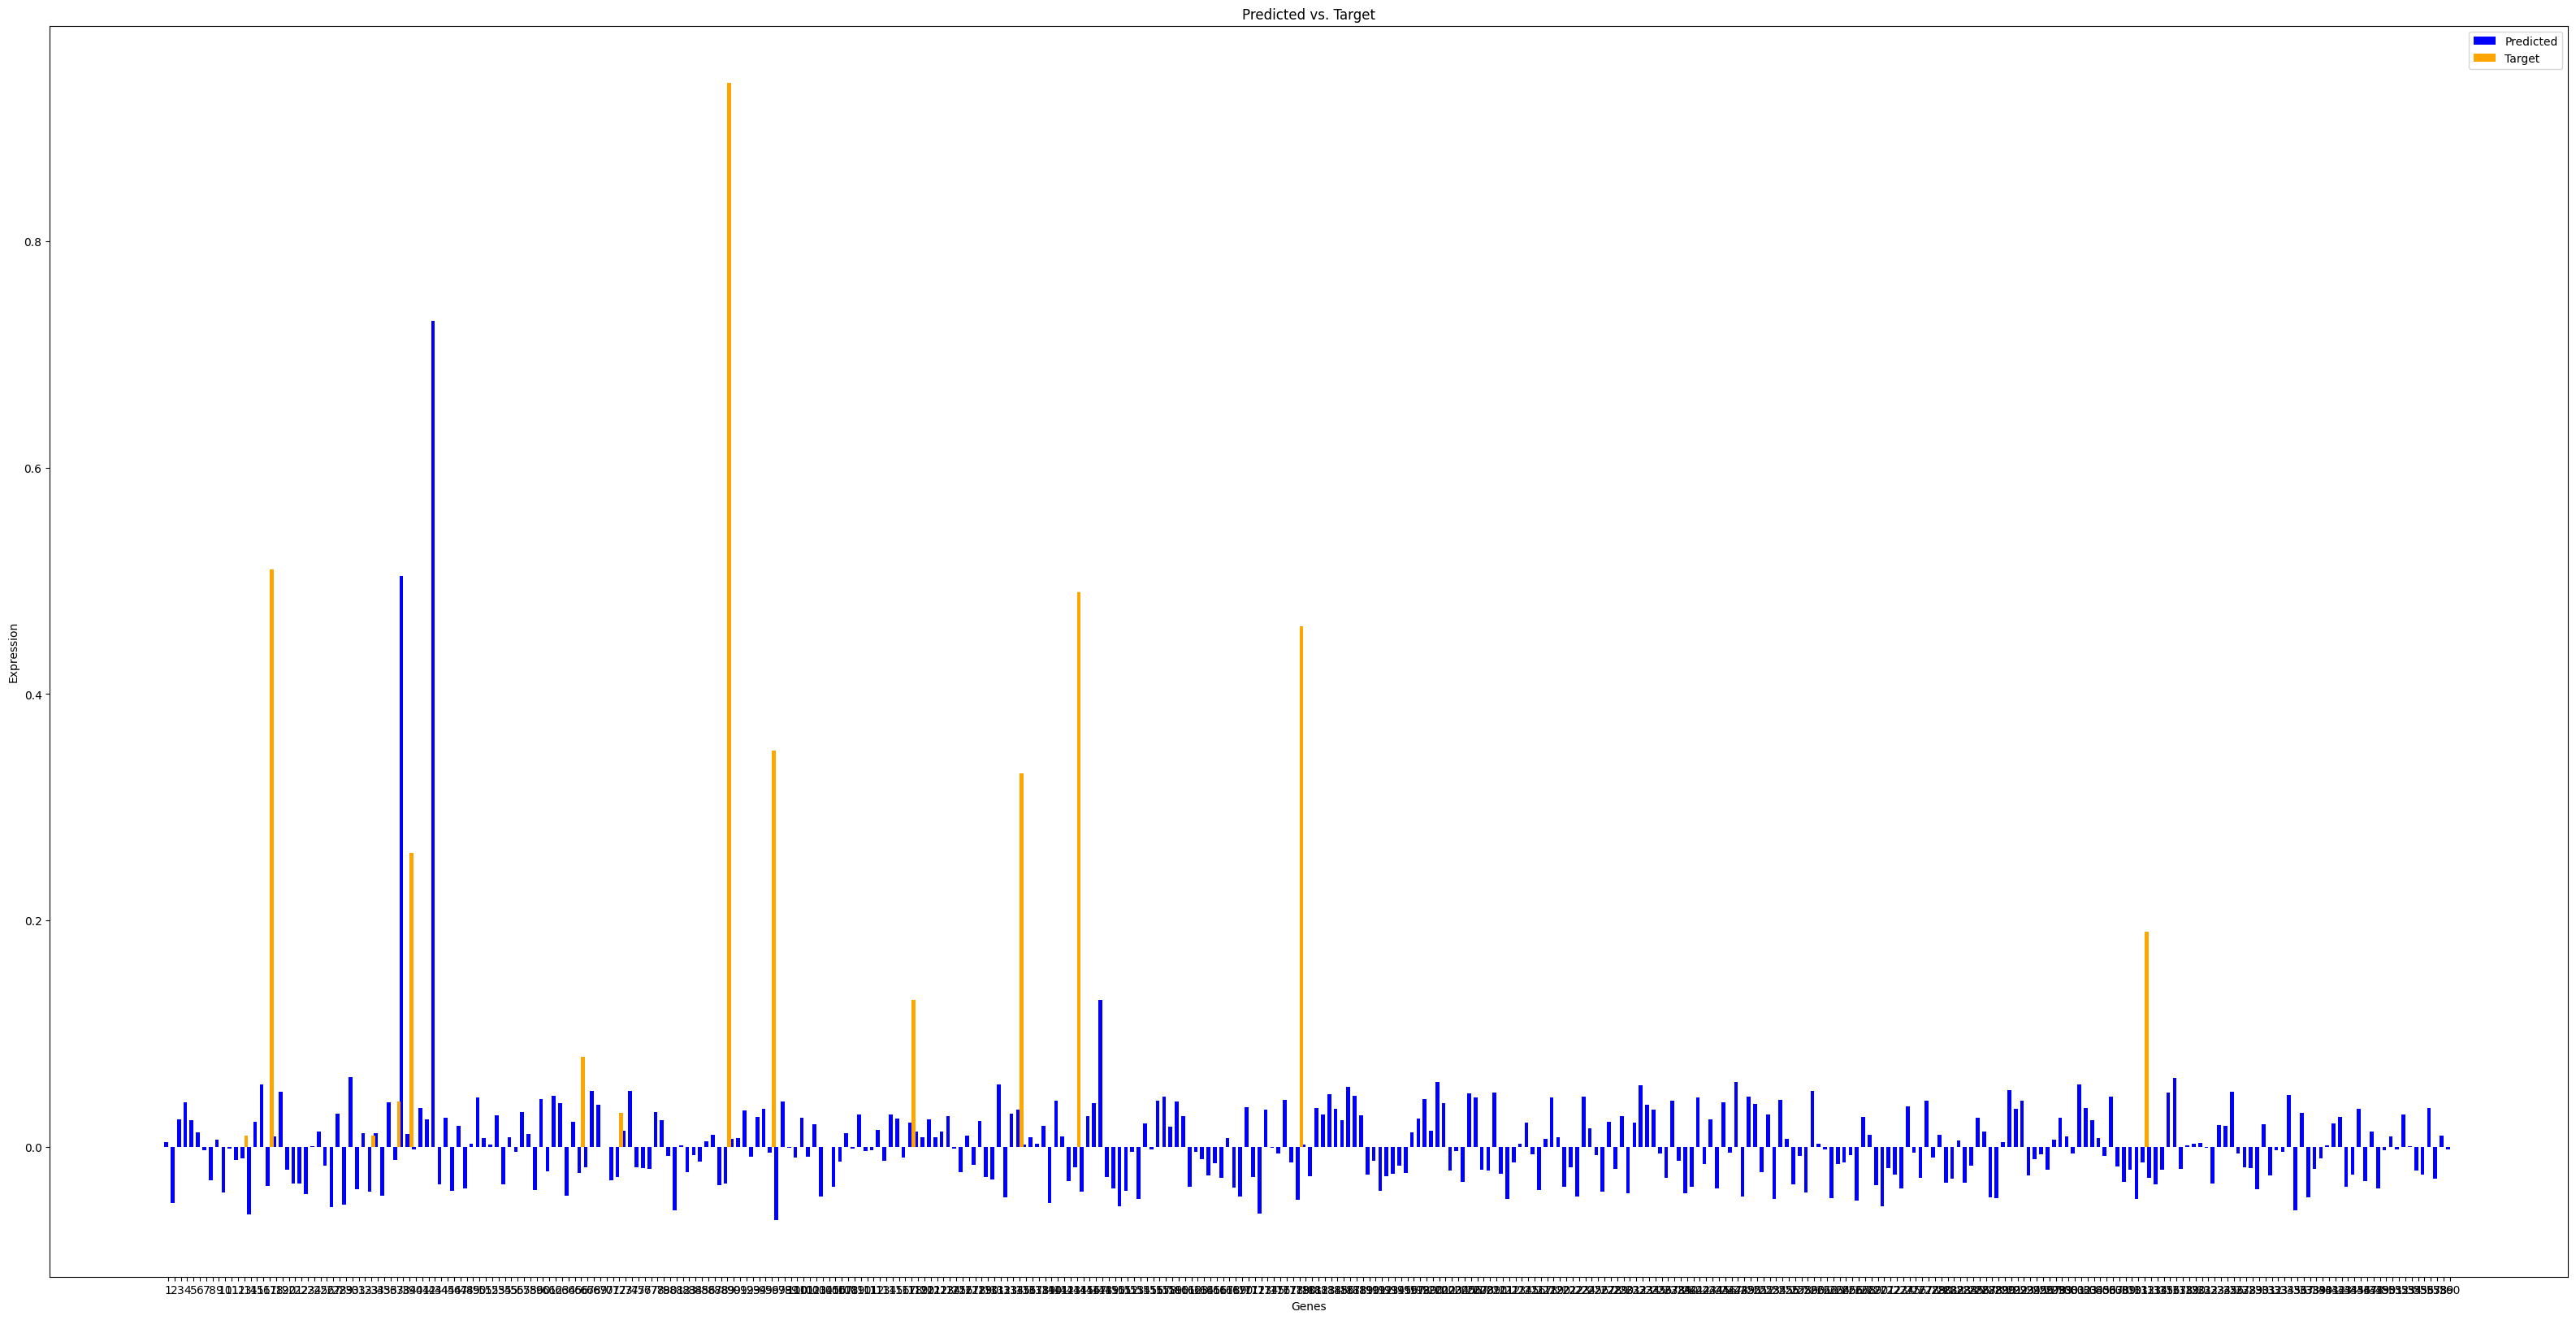

Mean squared error: 0.000003


In [28]:
# compare the predicted output with the actual output for the first sample by making a histogram plot, in which on the x-axis, we have 
# the genes (two bars for each gene, for the predicted and target values) from the first sample, and on the y-axis, we have the expression values 

# the sample number which we want to compare
sample = 10

# convert the first sample of the predicted output to a numpy array
output_np = prediction[sample].detach().numpy()
# output_np = test_prediction[sample].detach().numpy()

# convert the first sample of the target output to a numpy array
target_np = output_tensor[sample].detach().numpy()
# target_np = test_output_tensor[sample].detach().numpy()

# convert ouput_np and target_np to log2 scale after adding 1 to each value
# output_np = np.log2(output_np + 1)
# target_np = np.log2(target_np + 1)

# create a list of genes (basically numbers from 1 to 360)
genes = []
for i in range(1, 361):
    genes.append(i)

# convert genes to a numpy array
genes = np.array(genes)

# Set the width of the bars
barWidth = 0.6

# Create a figure and axis
fig, ax = plt.subplots(figsize=(40, 20))

# Plot the bars
bar1 = ax.bar(genes - barWidth/2, output_np, width=barWidth, color='blue', label='Predicted')
bar2 = ax.bar(genes + barWidth/2, target_np, width=barWidth, color='orange', label='Target')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Expression')
ax.set_xlabel('Genes')
ax.set_title('Predicted vs. Target')
ax.set_xticks(genes)
ax.legend()

# Save the figure and show
# plt.savefig('predicted_vs_target.png')
plt.show()

# print the mean squared error between the predicted and target values for the particular sample
print('Mean squared error: {:.6f}'.format(np.square(np.subtract(output_np[sample], target_np[sample])).mean()))